In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [ ]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [ ]:
data.shape

(571, 43)

In [ ]:
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [ ]:
scores = data.columns[data.columns.str.contains('score')].tolist()
scores

[]

In [ ]:
for score in scores:
    sns.histplot(data[score], element='bars', kde=True)
    plt.text(x=20, y=90, s=f"Skew: {round(data[score].skew(),2)}\nKurtosis: {round(data[score].kurt(),2)}")
    plt.show()


In [ ]:
data.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


pairplot:



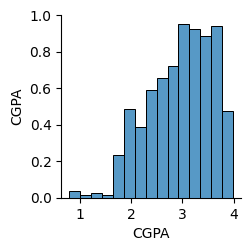

In [ ]:
sns.pairplot(data=data)


scores vs lunch type:



In [ ]:
for score in scores:
    sns.boxplot(y=data[score], x=data['lunch'])
    plt.show()

scores vs race/ ethnicity group:



In [ ]:
for score in scores:
    sns.boxplot(y=data[score], x=data['race/ethnicity'], order=sorted(data['race/ethnicity'].unique()))
    plt.show()


In [ ]:
for score in scores:
    sns.boxplot(y=data[score], x=data['gender'])
    plt.show()


In [ ]:
for score in scores:
    sns.boxplot(y=data[score], x=data['test preparation course'])
    plt.show()

In [ ]:
for score in scores:
    plt.figure(figsize=(10,5))
    sns.boxplot(y=data[score], x=data['parental level of education'])
    plt.xticks(rotation=15)
    plt.show()

In [ ]:
X, y = data.drop('CGPA', axis=1), data['CGPA']

cat_cols = X.dtypes[X.dtypes == 'O'].index.tolist()
cat_cols


['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [ ]:
ct = ColumnTransformer([
#     ('num', StandardScaler(), ['reading score', 'math score']),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [ ]:
ct.fit_transform(X).shape


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(571, 1135)

In [ ]:
pipe = Pipeline([
    ('trf', ct),
    ('model', LGBMRegressor(random_state=0))
])

In [ ]:
params = {
    'model__n_estimators':[100,130,150,170,190],
    'model__boosting_type': ['dart', 'gbdt', 'goss']
}

In [ ]:
gs = GridSearchCV(pipe, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)


In [ ]:
gs.fit(X, y)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Seat '
                                                                          'No.',
                                                                          'PH-121',
                                                                          'HS-101',
                                                                          'CY-105',
                                                                          'HS-105/12',
                                                                          'MT-111',
                                                                          'CS-105',
                                                                          'CS-106',
                                                                          'EL-102',
                                                                          'EE-119',
                                                                          'ME-107',
                                                                          'CS-107',
                                                                          'HS-205/20',
                                                                          'MT-222',
                                                                          'EE-222',
                                                                          'MT-224',
                                                                          'CS-210',
                                                                          'CS-211',
                                                                          'CS-203',
                                                                          'CS-214',
                                                                          'EE-217',
                                                                          'CS-212',
                                                                          'CS-215',
                                                                          'MT-331',
                                                                          'EF-303',
                                                                          'HS-304',
                                                                          'CS-301',
                                                                          'CS-302',
                                                                          'TC-383',
                                                                          'MT-442', ...])])),
                                       ('model',
                                        LGBMRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__boosting_type': ['dart', 'gbdt', 'goss'],
                         'model__n_estimators': [100, 130, 150, 170, 190]},
             scoring='neg_root_mean_squared_error')

In [ ]:

pd.DataFrame(gs.cv_results_).sort_values(by='rank_test_score')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__boosting_type,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.280350,0.006879,0.025383,0.001791,gbdt,190,"{'model__boosting_type': 'gbdt', 'model__n_est...",-0.171920,-0.202278,-0.188564,-0.177096,-0.215066,-0.190985,0.015935,1
8,0.367724,0.077540,0.037537,0.011182,gbdt,170,"{'model__boosting_type': 'gbdt', 'model__n_est...",-0.170684,-0.201039,-0.190082,-0.178124,-0.216199,-0.191226,0.016217,2
6,0.350175,0.089018,0.046256,0.017719,gbdt,130,"{'model__boosting_type': 'gbdt', 'model__n_est...",-0.170260,-0.199267,-0.190559,-0.178075,-0.219456,-0.191523,0.017170,3
7,0.353136,0.065802,0.046346,0.007845,gbdt,150,"{'model__boosting_type': 'gbdt', 'model__n_est...",-0.170751,-0.200762,-0.190433,-0.177905,-0.218096,-0.191589,0.016790,4
5,0.183541,0.012321,0.023545,0.000741,gbdt,100,"{'model__boosting_type': 'gbdt', 'model__n_est...",-0.170673,-0.194058,-0.194204,-0.175892,-0.223870,-0.191739,0.018648,5
14,0.139290,0.024241,0.023344,0.003507,goss,190,"{'model__boosting_type': 'goss', 'model__n_est...",-0.195694,-0.210857,-0.217476,-0.187278,-0.246521,-0.211565,0.020490,6
13,0.145978,0.008631,0.026332,0.002138,goss,170,"{'model__boosting_type': 'goss', 'model__n_est...",-0.196445,-0.211876,-0.218772,-0.187280,-0.249796,-0.212834,0.021559,7
12,0.131937,0.003126,0.024153,0.002342,goss,150,"{'model__boosting_type': 'goss', 'model__n_est...",-0.203048,-0.213426,-0.222190,-0.188864,-0.253699,-0.216246,0.021772,8
11,0.132309,0.007051,0.025727,0.002192,goss,130,"{'model__boosting_type': 'goss', 'model__n_est...",-0.204084,-0.213045,-0.221975,-0.190358,-0.257068,-0.217306,0.022459,9
10,0.117570,0.006967,0.023563,0.001172,goss,100,"{'model__boosting_type': 'goss', 'model__n_est...",-0.214845,-0.214584,-0.227579,-0.192945,-0.261817,-0.222354,0.022655,10


{'model__boosting_type': 'gbdt', 'model__n_estimators': 190}

In [ ]:
gs.best_score_


-0.190984763009071

In [ ]:
gs.best_estimator_


Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Seat No.', 'PH-121',
                                                   'HS-101', 'CY-105',
                                                   'HS-105/12', 'MT-111',
                                                   'CS-105', 'CS-106', 'EL-102',
                                                   'EE-119', 'ME-107', 'CS-107',
                                                   'HS-205/20', 'MT-222',
                                                   'EE-222', 'MT-224', 'CS-210',
                                                   'CS-211', 'CS-203', 'CS-214',
                                                   'EE-217', 'CS-212', 'CS-215',
                                                   'MT-331', 'EF-303', 'HS-304',
                                                   'CS-301', 'CS-302', 'TC-383',
                                                   'MT-442', ...])])),
                ('model', LGBMRegressor(n_estimators=190, random_state=0))])

In [ ]:
joblib.dump(gs.best_estimator_, 'model.joblib')


['model.joblib']

importing the model:



In [ ]:
mdl = joblib.load('model.joblib')


Making predictions on a new data point NOT seen by the model



In [ ]:
q = pd..dataframe([['CGPA',50,87]], columns=x.columns)

In [ ]:
mdl.predict(q)
